# TITLE

# IPL Match Winner Prediction using Machine Learning

# Aim

* To develop a machine learning model that can accurately predict the winner of a match based on related features.

# Objectives

* Understand and preprocess the dataset by analyzing key columns such as season, teams, toss details, match result, and venue.

* Explore data trends 

* Build predictive models using algorithms like Logistic Regression, SVM, KNN, Decision Tree, Random Forest, and XGBoost.

* Evaluate model performance using appropriate metrics (accuracy, precision, recall, F1-score).

* Tune hyperparameters to improve the performance of the best-performing model.

* Select the final model that offers the highest prediction accuracy and save it for deployment.



## Importing Required Libraries

import python libraries for data analysis and visualization:

- **pandas**: For data dataframe 
- **numpy**: For numerical.  
- **matplotlib**: For visualizations.  
- **seaborn**: For attractive statistical visualizations.  
- **warnings**: To ignore unnecessary warning messages for cleaner output.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# Loading the Dataset

In [3]:
ipl=pd.read_csv("ipl_matches.csv")

# Viewing Dataset Records

In [4]:
ipl.head(756)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


# dtypes Used For Check the Data Type

In [5]:
ipl.dtypes

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

# info() Used For Infromation Of DataSet

In [6]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# nunique() Used For Unique Values Count

In [7]:
ipl.nunique()

id                 756
Season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

# isnull() Used For Check Null Values And Count Of Null Values

In [8]:
ipl.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Handling Missing Values

In [9]:
ipl["player_of_match"] = ipl.apply(
    lambda row: f"{row['winner']}_Player" if pd.isnull(row["player_of_match"]) else row["player_of_match"],
    axis=1
)

In [10]:
team_winner_map = {
    "Delhi Daredevils": "Delhi Daredevils",
    "Royal Challengers Bangalore": "Royal Challengers Bangalore",
}

# Loop through dictionary and replace null city values
for team, winner in team_winner_map.items():
    ipl.loc[(ipl["team1"] == team) & (ipl["winner"].isnull()), "winner"] = winner

In [11]:
team_city_map = {
    "Mumbai Indians": "Pune",
    "Royal Challengers Bangalore": "Bangalore",
    "Kolkata Knight Riders": "Kolkata",
    "Chennai Super Kings": "Chennai",
    "Sunrisers Hyderabad": "Hyderabad"
}
for team, city in team_city_map.items():
    ipl.loc[(ipl["team1"] == team) & (ipl["city"].isnull()), "city"] = city

In [12]:
ipl['umpire1'].fillna(ipl['umpire1'].mode()[0],inplace=True)
ipl['umpire2'].fillna(ipl['umpire2'].mode()[0],inplace=True)

In [13]:
ipl.head(745)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,11336,IPL-2019,Jaipur,27-04-2019,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,JD Unadkat,Sawai Mansingh Stadium,Yeshwant Barde,Nand Kishore,Sundaram Ravi
741,11337,IPL-2019,Delhi,28-04-2019,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan,C Shamshuddin
742,11338,IPL-2019,Kolkata,28-04-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar
743,11339,IPL-2019,Hyderabad,29-04-2019,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan,Nanda Kishore


In [14]:
ipl =ipl.drop(columns=["umpire3","id"]) 
#"team1","team2"])

In [15]:
ipl.isnull().sum()

Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

**Missing Values Filled with Mode**

* Columns like city, winner, player_of_match, umpire1, and umpire2 had missing entries.

* Using the mode (most frequent value), categorical columns are complete without removing rows

# Combining Umpire Columns

In [16]:
ipl["umpires"] = ipl["umpire1"] + ", " + ipl["umpire2"]
#ipl["Match"]=ipl["team1"]+" Vs " + ipl["team2"]

In [17]:
ipl =ipl.drop(columns=["umpire1","umpire2"])

* Useful for exploratory data analysis, like which umpire combinations occur most frequently.

# Converting and Formatting the Date Columns

In [18]:
ipl["date"] = ipl["date"].astype(str)

In [19]:
ipl["date"] = pd.to_datetime(ipl["date"], dayfirst=True)
ipl["date"] = pd.to_datetime(ipl["date"]).dt.strftime("%Y-%m-%d")

In [20]:
ipl["date"]=ipl["date"].astype("object")

In [21]:
ipl

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpires
0,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal","AY Dandekar, NJ Llong"
1,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,"A Nand Kishore, S Ravi"
2,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,"Nitin Menon, CK Nandan"
3,IPL-2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,"AK Chaudhary, C Shamshuddin"
4,IPL-2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,"HDPK Dharmasena, C Shamshuddin"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,IPL-2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,"Nanda Kishore, O Nandan"
752,IPL-2019,Chennai,2019-05-07,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,"Nigel Llong, Nitin Menon"
753,IPL-2019,Visakhapatnam,2019-05-08,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,"HDPK Dharmasena, C Shamshuddin"
754,IPL-2019,Visakhapatnam,2019-05-10,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,"Sundaram Ravi, Bruce Oxenford"


# Dropping Unnecessary Columns

In [22]:
ipl

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpires
0,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal","AY Dandekar, NJ Llong"
1,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,"A Nand Kishore, S Ravi"
2,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,"Nitin Menon, CK Nandan"
3,IPL-2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,"AK Chaudhary, C Shamshuddin"
4,IPL-2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,"HDPK Dharmasena, C Shamshuddin"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,IPL-2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,"Nanda Kishore, O Nandan"
752,IPL-2019,Chennai,2019-05-07,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,"Nigel Llong, Nitin Menon"
753,IPL-2019,Visakhapatnam,2019-05-08,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,"HDPK Dharmasena, C Shamshuddin"
754,IPL-2019,Visakhapatnam,2019-05-10,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,"Sundaram Ravi, Bruce Oxenford"


In [23]:
ipl.shape

(756, 15)

# Checking for Duplicate Rows

In [24]:
duplicates = ipl[ipl.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Season, city, date, team1, team2, toss_winner, toss_decision, result, dl_applied, winner, win_by_runs, win_by_wickets, player_of_match, venue, umpires]
Index: []


**Insights**
* no duplicate rows in ipl dataset


# THE DESCRIBE( ) IS USED TO IDENTIFY STATISTICAL CALCULATION FOR NUMERICAL COLUMNS


In [25]:
ipl.describe()

,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000
mean,0.025132,13.283069,3.350529
std,0.156630,23.471144,3.387963
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000
75%,0.000000,19.000000,6.000000
max,1.000000,146.000000,10.000000


In [26]:
ipl.dtypes

Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpires            object
dtype: object

# OUTLIERS

--- BOXPLOTS FOR SELECTED COLUMNS---

THIS CODE FOR FIND OUTLIERS IN COLUMNS IN IPL DATAFRAME

In [27]:
ipl1=ipl[['win_by_runs','win_by_wickets']]
len(ipl1.columns)

2

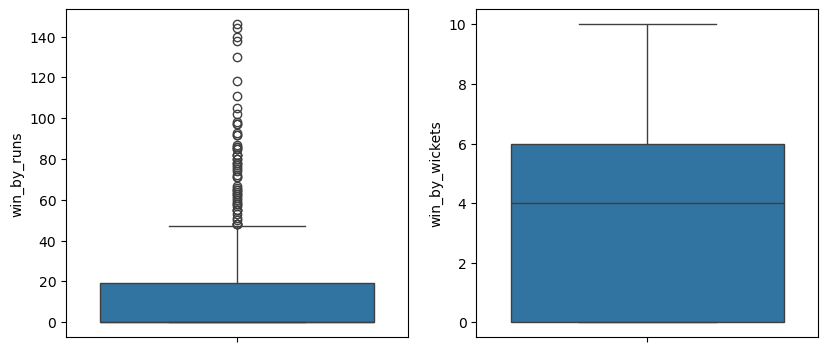

In [28]:
plt.figure(figsize=(15,40))
for i in range(len(ipl1.columns)):
    plt.subplot(8, 3,i+1)
    sns.boxplot(y=ipl1.columns[i],data=ipl)
plt.show()

* They Above The Two Chart Which win_by_runs and win_by_wickets
* Can't Remove Outliers
* Win by runs high-scoring outliers
* Win by wickets. Most wins are by 4-6 wickets, with no extreme outliers.

# DATA VISUALIZATIONS

**UNIVARIATE CHART ANALYSIS**

# BAR CHART
* THIS BAR VISUALIZATION TO SHOW THE COUNT OF THE MATCHES PER SEASON

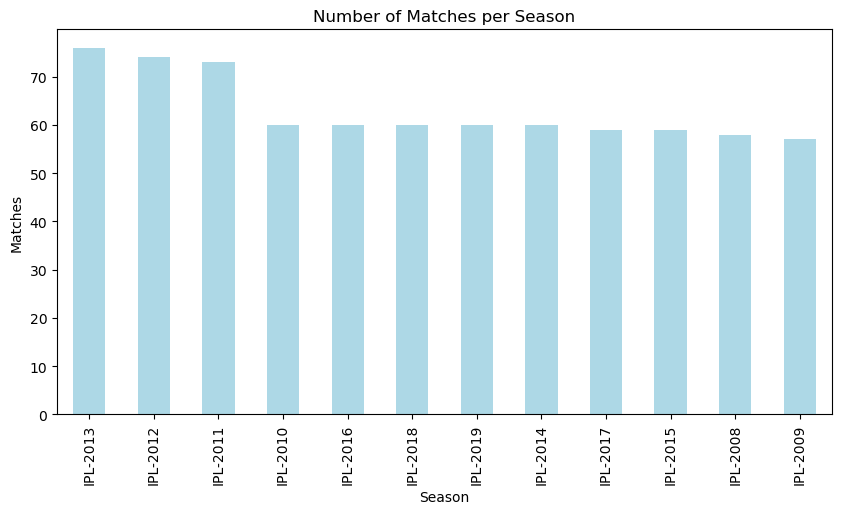

In [29]:
ipl["Season"].value_counts().plot(kind="bar", figsize=(10,5),color='lightblue')
plt.title("Number of Matches per Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()

**INSIGHTS**

* IPL-2013, 2012, and 2011 had the most matches (over 70).

* IPL-2009 and 2008 had the fewest matches (under 60).

* The number of matches per season varied significantly, with a peak from 2011-2013 and a lower, more consistent number in the other seasons.

 **--THIS BAR VISUALIZATION TO SHOW THE COUNT OF THE TOP MOST MATCHS CITIES IN COUNT--**

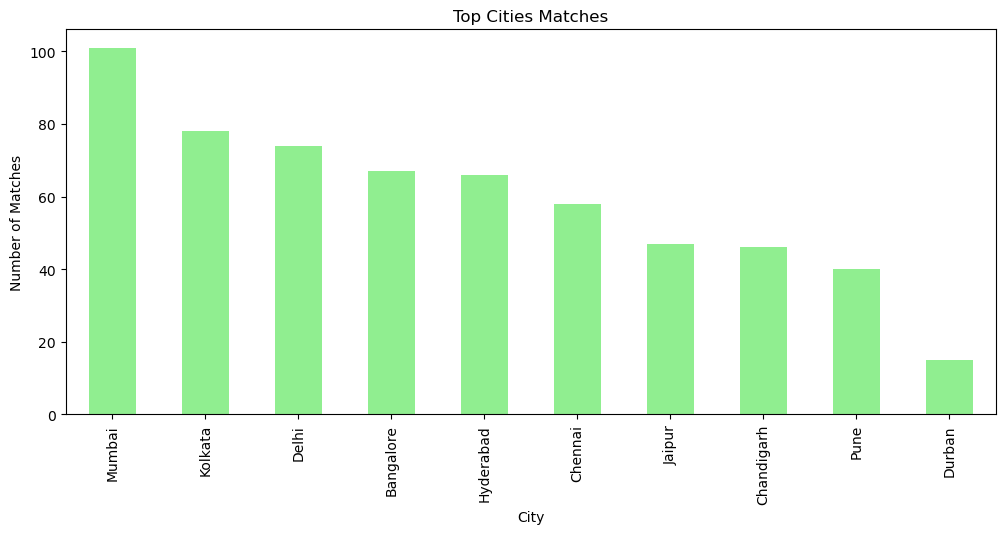

In [30]:
ipl["city"].value_counts().head(10).plot(kind="bar", figsize=(12,5),color='lightgreen')
plt.title("Top Cities Matches")
plt.xlabel("City")
plt.ylabel("Number of Matches")
plt.show()

# INSIGHTS
* Mumbai hosted the most matches (over 100), making it the top venue.

* Kolkata and Delhi are the next most frequent hosts.

* Durban hosted the fewest matches among the cities listed.

--THIS BAR VISUALIZATION TO SHOW THE COUNT OF THE **TOP MOST SUCCESSFUL TEAMS**--

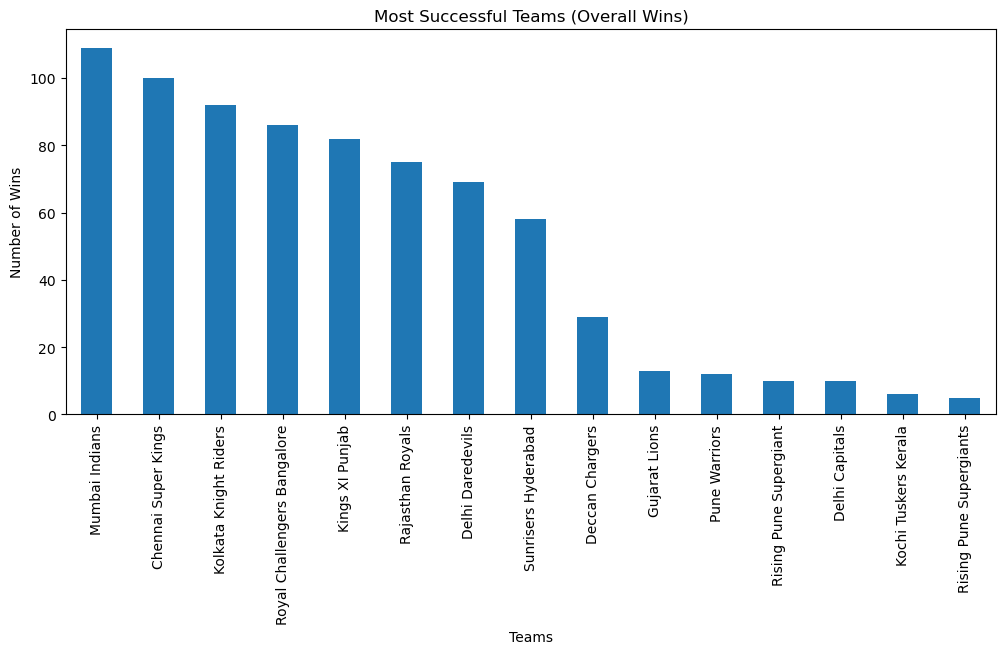

In [31]:

ipl["winner"].value_counts().plot(kind="bar", figsize=(12,5))
plt.title("Most Successful Teams (Overall Wins)")
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.show()

# INSIGHTS
* **Mumbai Indians** are the most successful team with over 100 wins.

* **Chennai Super Kings** and **Kolkata Knight** Riders are the next most successful.

* The chart shows a significant drop-off in wins for teams beyond the top three. Some teams at the bottom, 
  Kochi Tuskers Kerala, Rising Pune Supergiants, and Pune Warriors, have very few wins.

--THIS BAR VISUALIZATION TO SHOW THE COUNT OF THE **MATCHES AFFECTED BY DL ( Duckworth–Lewis )** --

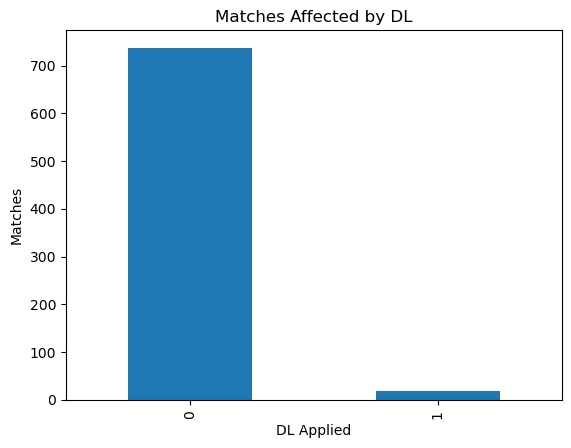

In [32]:
ipl["dl_applied"].value_counts().plot(kind="bar")
plt.title("Matches Affected by DL")
plt.xlabel("DL Applied")
plt.ylabel("Matches")
plt.show()

# INSIGHTS

* DL SCORE NOT APPLIED TO MOST OF THE MATCHES (700 ABOVE MATCHES), 0-NOT APPLIED, 1- APPLIED.

* DL SCORE APPLIED IS RARE MATCHES (BELOW 10 MATCHES).

# PIE CHART

The pie chart uses different colors to distinguish between the two categories **"field" (blue) and "bat" (orange).**

Each slice's size is determined by its percentage share of the total toss decisions.

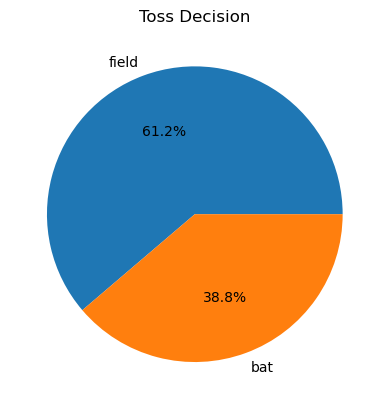

In [33]:
toss_dec=ipl['toss_decision'].value_counts()
plt.pie(toss_dec,labels=toss_dec.index,autopct='%1.1f%%')
plt.title('Toss Decision')
plt.show()

--  **HISTOGRAM PLOT**

*  THIS **HISTOGRAM VISUALIZATION** TO SHOW THE COUNT OF THE **Win_By_Runs**

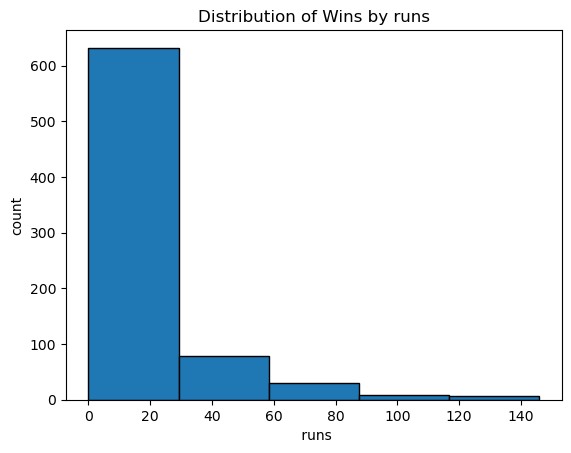

In [34]:
plt.hist(ipl['win_by_runs'],bins=5,edgecolor='black')
plt.xlabel(' runs')
plt.ylabel('count')
plt.title('Distribution of Wins by runs')
plt.show()

**--INSIGHTS--**

* Over 600 matches were won by a small margin (0-25 runs).

* Wins by large margins (60+ runs) are very rare

--THIS **HISTOGRAM VISUALIZATION** TO SHOW THE COUNT OF THE **Win_By_Wickets**--

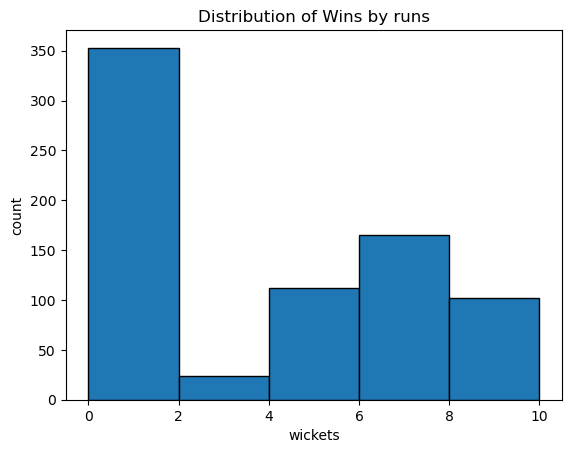

In [35]:
plt.hist(ipl['win_by_wickets'],bins=5,edgecolor='black')
plt.xlabel('wickets')
plt.ylabel('count')
plt.title('Distribution of Wins by runs')
plt.show()

**--INSIGHTS--**

* Over 350 matches were won by a small margin (0-2 Wickets).

* Wickets by large margins (2-4 Wickets) are very rare

--THIS BAR VISUALIZATION TO SHOW THE MATCH COUNT OF THE **TOP 10 PLAYER OF THE MATCHES)** --

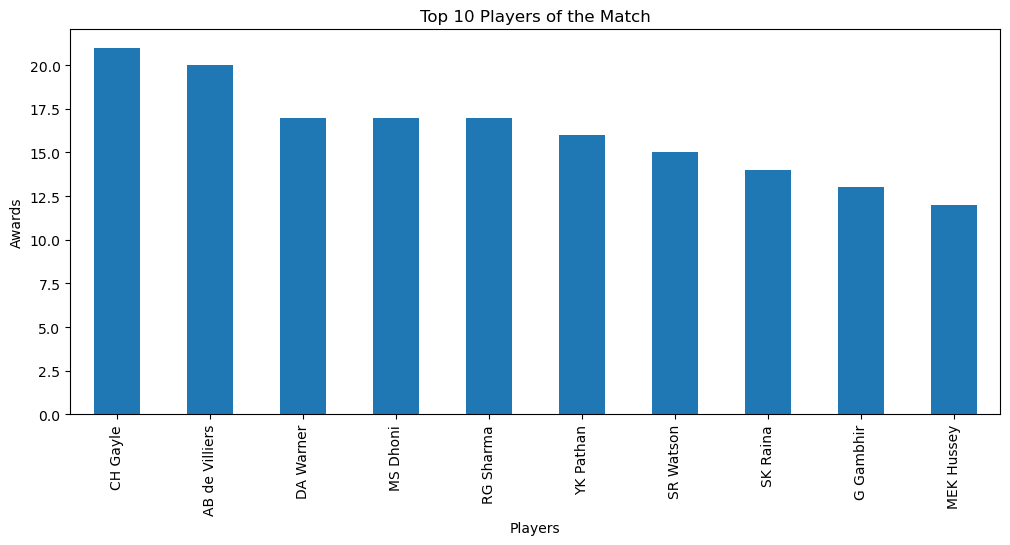

In [36]:
ipl["player_of_match"].value_counts().head(10).plot(kind="bar", figsize=(12,5))
plt.title("Top 10 Players of the Match")
plt.xlabel("Players")
plt.ylabel("Awards")
plt.show()

# INSIGHTS
* Chris Gayle is the clear leader, with a significantly higher number of "Player of the Match" awards (25) than anyone else on the list.

* AB de Villiers is a strong second with 20 awards.

* The number of awards gradually decreases for the rest of the players on the list,
  from MS Dhoni and RG Sharma (17 each) down to MEK Hussey (12). 
      
* This chart provides a clear ranking of the most impactful and consistent performers in the dataset.

-- THIS BAR VISUALIZATION TO SHOW THE MATCH COUNT OF THE ( **TOP 10 UMPIRES OF THE MATCHES** ) --

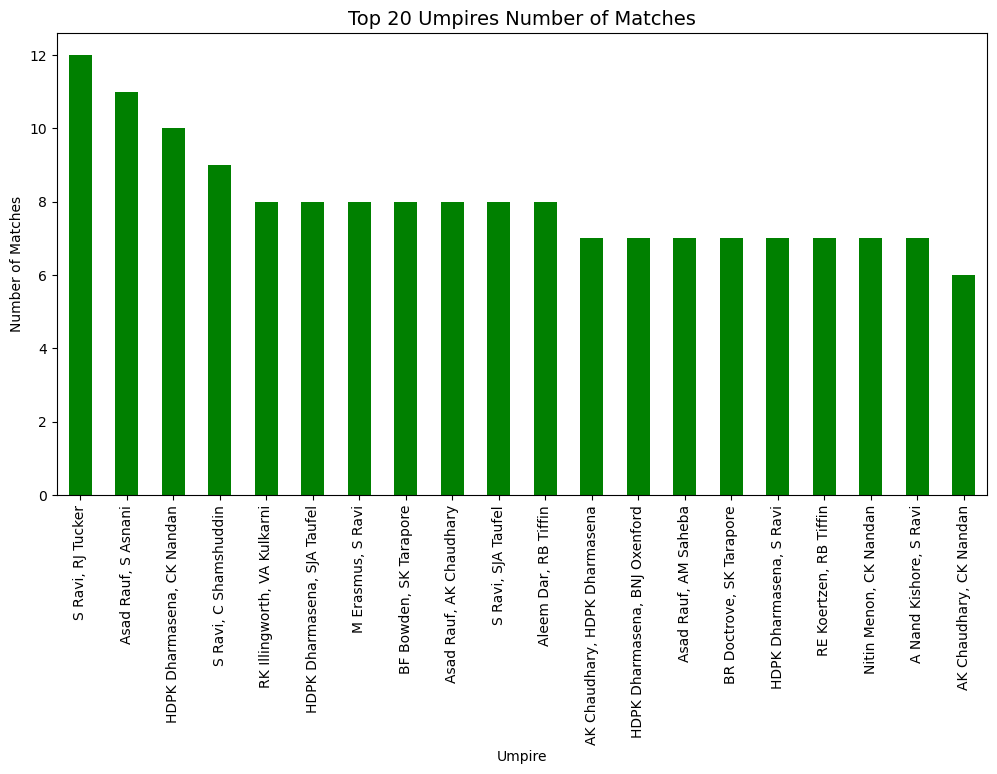

In [37]:
plt.figure(figsize=(12,6))
ipl["umpires"].value_counts().head(20).plot(kind="bar", color="green")
plt.title("Top 20 Umpires Number of Matches", fontsize=14)
plt.ylabel("Number of Matches")
plt.xlabel("Umpire")
plt.show()

# INSIGHTS 

* The umpires with the highest number of matches are S. Ravi, RJ Tucker, followed closely by S. Ravi, S Asnani. 
 They have officiated approximately 12 and 11 matches, respectively, placing them at the top of the list.

* After the top two, there's a significant drop-off. 
Most of the other umpires on the chart have officiated a similar number of matches,
falling into a range between 7 and 9.

# **BAR PLOT**

* This code visualizes the number of closely contested IPL matches per
* Selects matches where the winning margin was 10 runs or the team won by 2 wickets.

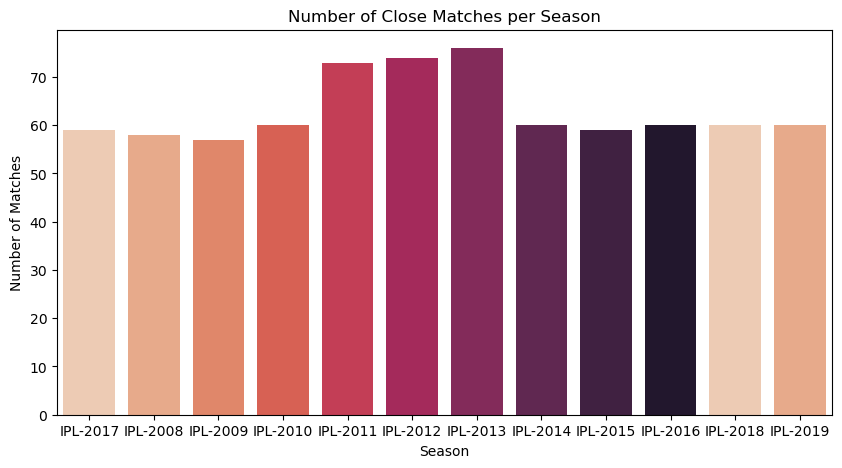

In [38]:
close_matches = ipl[(ipl['win_by_runs'] <= 10) | (ipl['win_by_wickets'] <= 2)]
plt.figure(figsize=(10,5))
sns.countplot(x='Season', data=close_matches, palette=sns.color_palette("rocket_r", 10))
plt.title("Number of Close Matches per Season")
plt.ylabel("Number of Matches")
plt.show()

# INSIGHTS
* The highest number of close matches occurred in IPL 2011–2013 (around 73–76 matches).

* IPL 2009 had the lowest count of close matches.

* After 2013, the number of close matches dropped and stayed more stable across seasons.

* Overall, there was a peak in competitive balance between 2011–2013, followed by a decline in later years.

# bivariate chart

**--Bivariate Count Plot--**

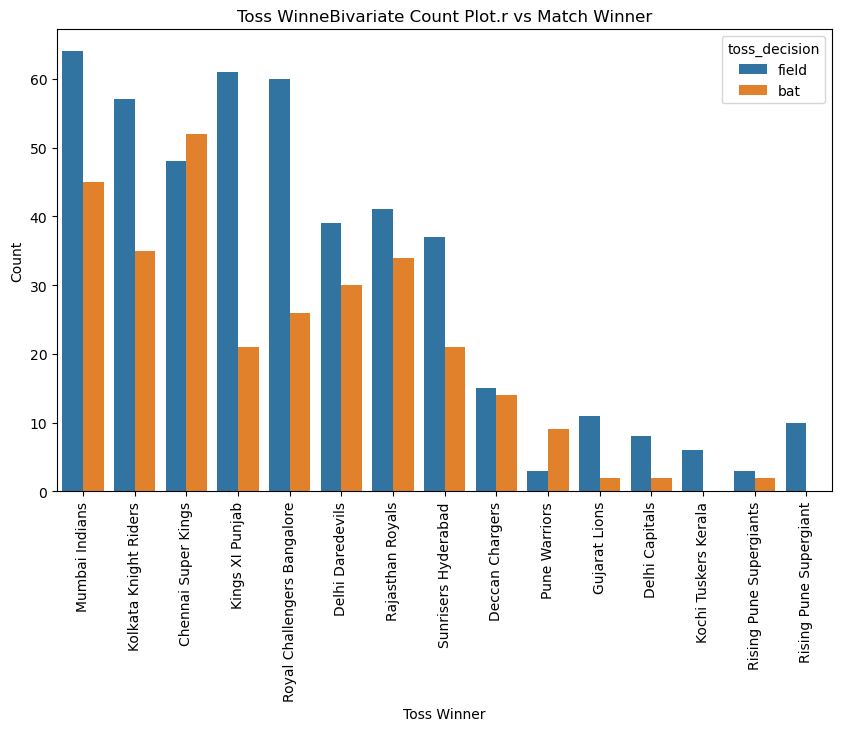

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(data=ipl, x="winner", hue="toss_decision", order=ipl["toss_winner"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Toss WinneBivariate Count Plot.r vs Match Winner")
plt.xlabel("Toss Winner")
plt.ylabel("Count")
plt.show()

# INSIGHTS

* Winning the toss and choosing to field first generally leads to a higher win rate for most teams.

* Choose To field  first in  Mumbai Indians and Kings XI Punjab were the most successful teams in winning matches after winning the toss, and to low 
  perfromance to after toss_Decision (Pune Warriors and Rising Pune Supergiants)

* Choose To Bat First in  Mumbai Indians and Chennai Super Kings were the most successfully teams in winning matches after winning the toss,and to low 
  performence To after toss_Decision (Delhi Capitals and Rising Pune Supergiants)  

# SCATTER PLOTS

 USED TO VISUALIZE THE **RELATIONSHIPS OR PATTERNS** IN PLOTS

* DIFFERENT MARKER CAN BE USED TO DIFFERENTIATE THE PLOTS ('O' , '-' , 'S' , '^' , '*' , ect)

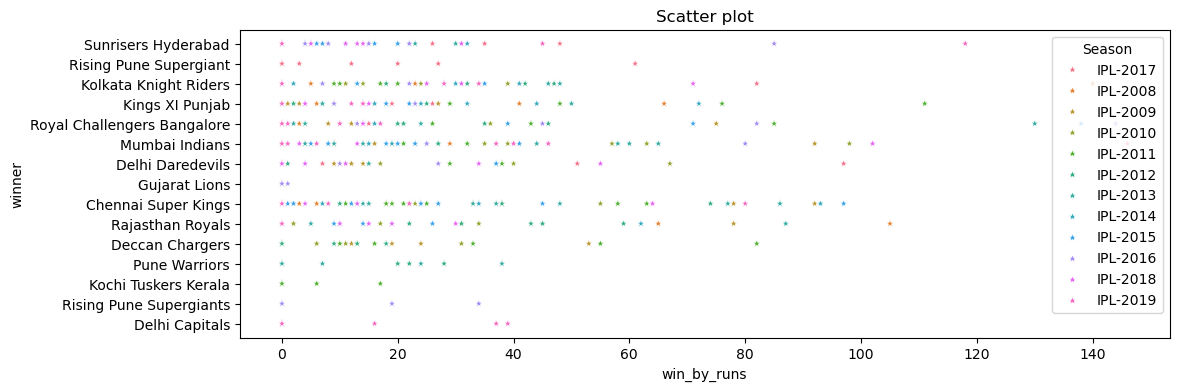

In [40]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='win_by_runs',y='winner',hue='Season',data=ipl,marker='*')
plt.title('Scatter plot')
plt.show()

# INSIGHTS
* Most wins are within 0–40 runs.

* Only a few matches show wins of 60+ runs.

* Rare cases exist with wins over 100 runs.

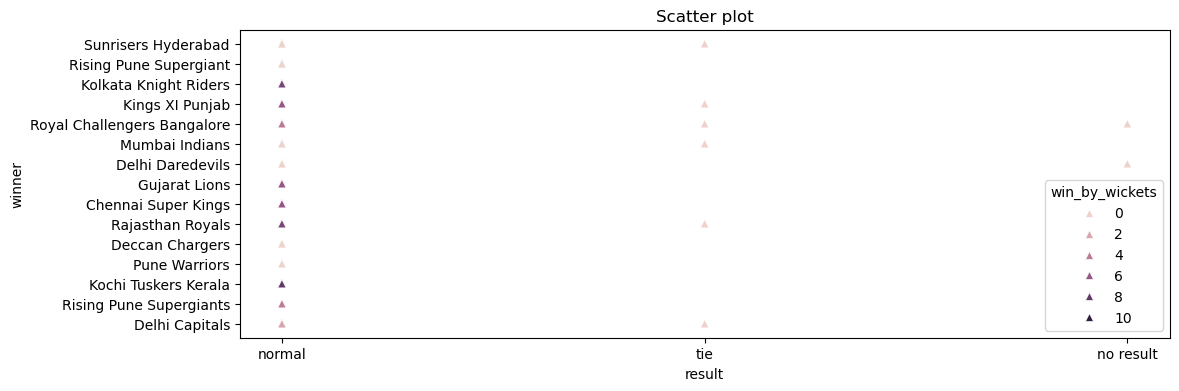

In [41]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='result',y='winner',hue='win_by_wickets',data=ipl,marker='^')
plt.title('Scatter plot')
plt.show()

# INSIGHTS

* Most matches end as “normal results”, with very few ties or no results.

* Winning by 6–8 wickets is quite common across many teams.

* Rare cases of 10-wicket victories are visible, showing strong dominance.

# GROUPED BAR PLOT

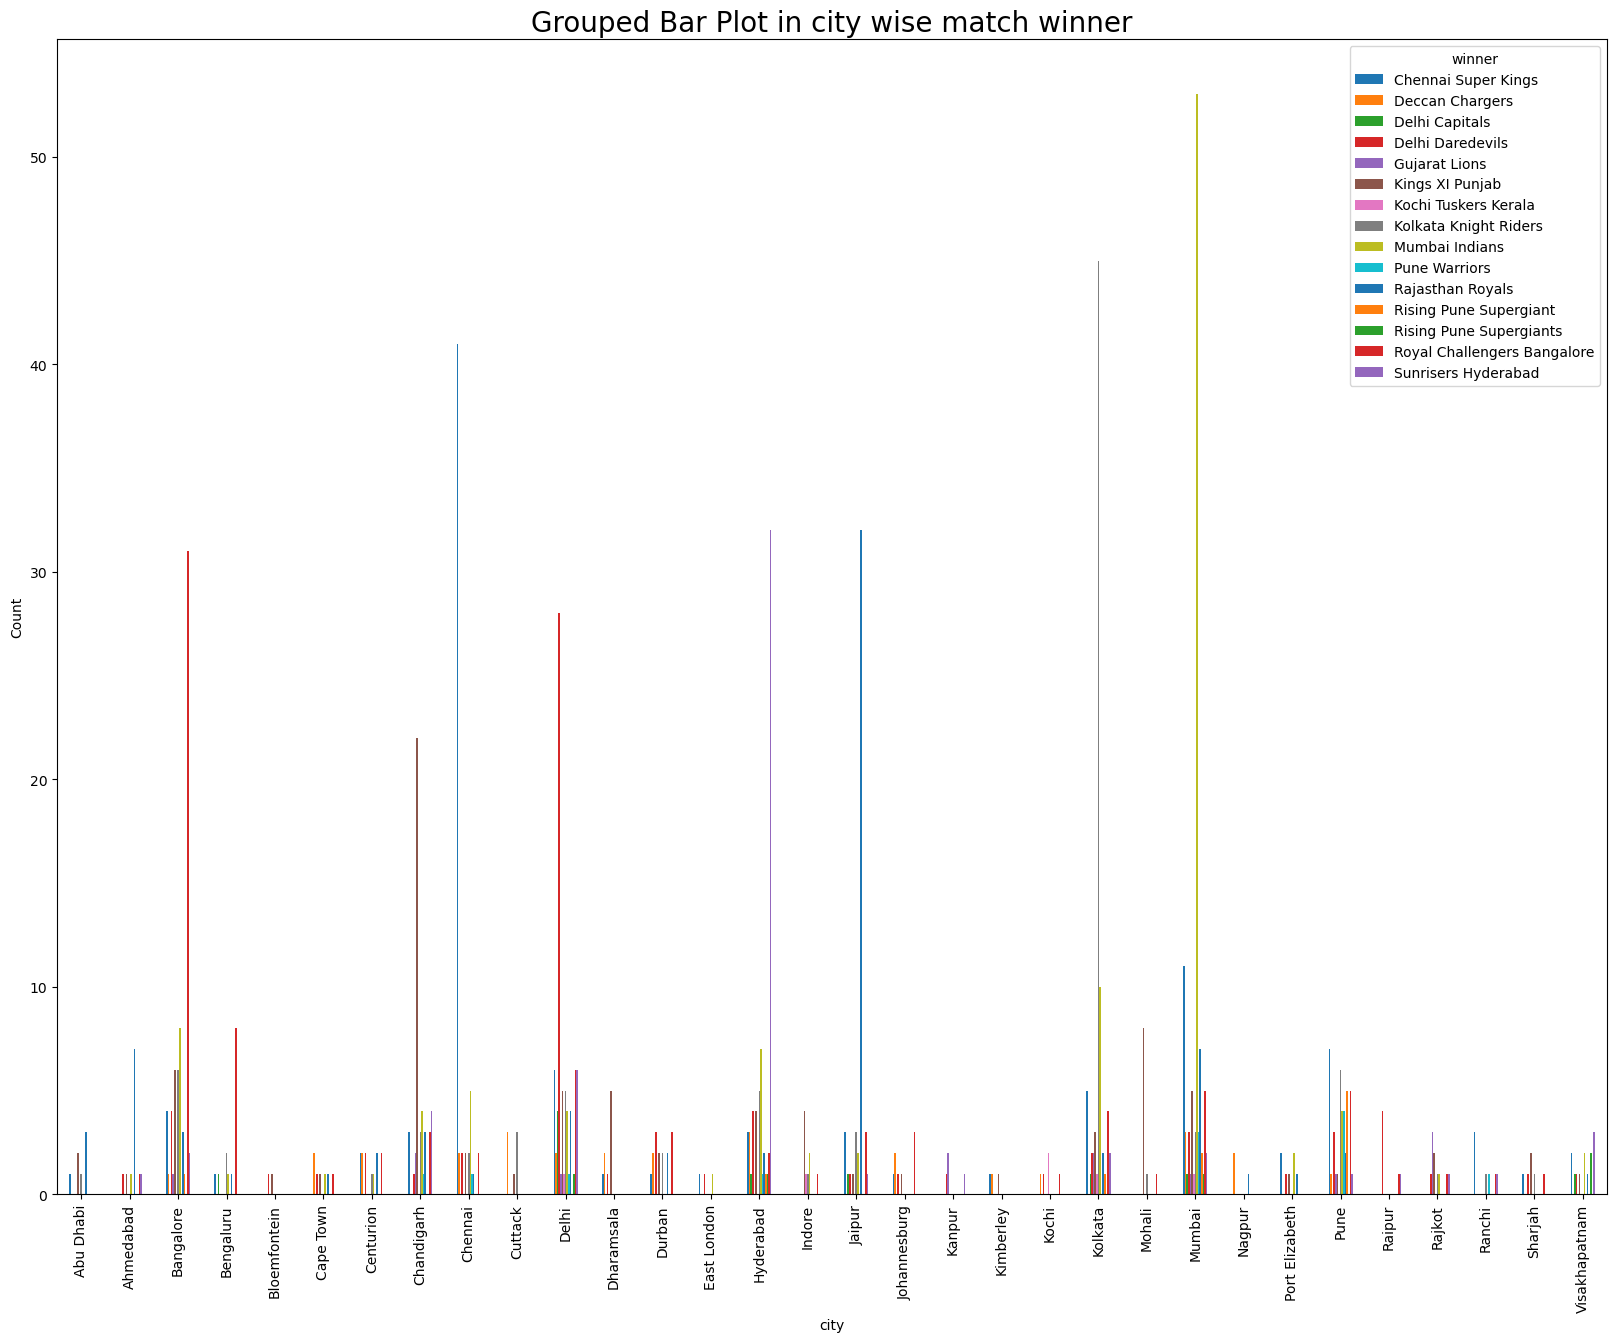

In [42]:
city_wise=ipl.groupby(['city','winner']).size().reset_index(name='count')
pivot_df=city_wise.pivot(index='city',columns='winner',values='count')
pivot_df.plot(kind='bar',figsize=(20,15))
plt.xticks(rotation=90)
plt.title('Grouped Bar Plot in city wise match winner',fontsize=20)
plt.xlabel('city')
plt.ylabel('Count')
plt.show()

# INSIGHTS
* Mumbai dominates – Teams have won the highest number of matches in Mumbai, making it the most successful IPL venue.

* Bengaluru, Chennai, and Kolkata are also strong venues with consistently higher win counts.

* Hyderabad and Jaipur show good performance but with slightly fewer wins compared to top cities.

* Smaller venues like Ranchi, Rajkot, Cuttack, Kanpur have hosted only a few matches, leading to very low win counts

# MULTIVARIET ANALYSIS

**CORRELATION HEATMAP**
* THIS CORRELATION HEATMAP VISUALLY SHOW THE STRONGLY PAIRS OF VARIABLES ARE RELATED

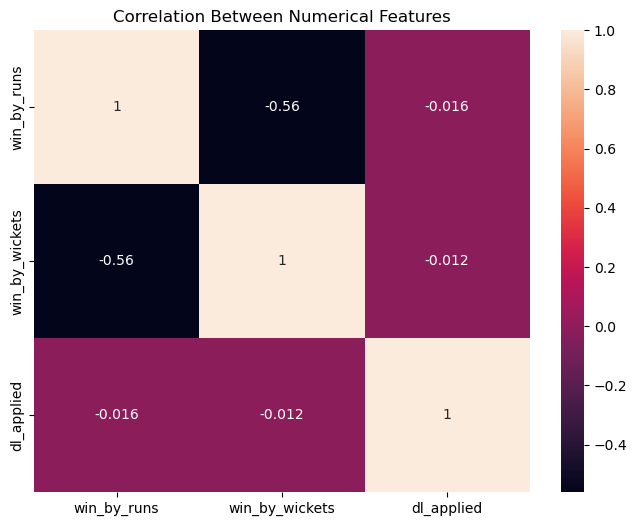

In [43]:
num_cols = ['win_by_runs', 'win_by_wickets', 'dl_applied']
plt.figure(figsize=(8,6))
sns.heatmap(ipl[num_cols].corr(), annot=True)
plt.title("Correlation Between Numerical Features")
plt.show()

# INSIGHTS
* The correlation heatmap shows that win_by_runs and win_by_wickets are moderately negatively correlated (-0.56), which aligns with cricket rules (a team can either win by runs or by wickets, but not both). 

* The dl_applied feature has negligible correlation with both, suggesting it independently affects match outcomes without directly influencing the margin of victory.

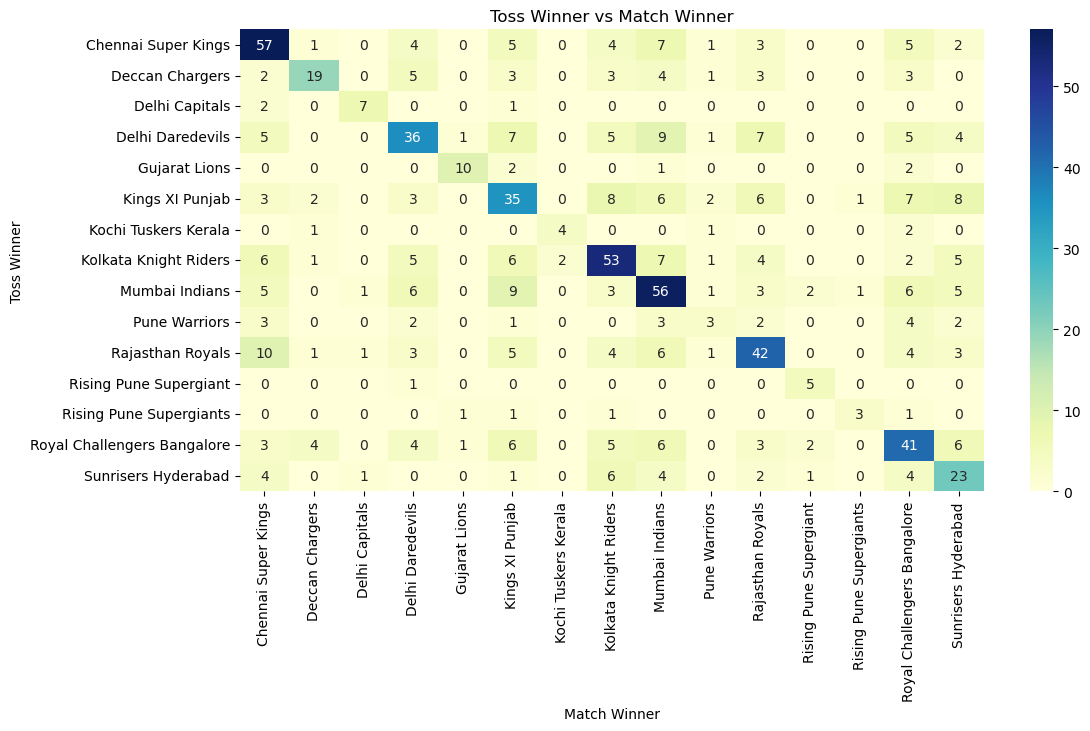

In [44]:
toss_match = pd.crosstab(ipl['toss_winner'], ipl['winner'])

plt.figure(figsize=(12,6))
sns.heatmap(toss_match, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Toss Winner vs Match Winner")
plt.xlabel("Match Winner")
plt.ylabel("Toss Winner")
plt.show()

# INSIGHTS
* The Mumbai Indians show a relatively high win correlation.
* CSK (57), MI (56), KKR (53) → best at converting toss wins into match wins.

* RR (42), RCB (41), DD (36), KXIP (35) → mid-level performance.

* Kochi, Pune Warriors, Gujarat Lions, RPS → weak, toss advantage barely helped.

* Toss mattered most in rivalries: CSK vs DD (36), MI vs KKR (56), KKR vs MI (53).

In [45]:
ipl.head(10)

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpires
0,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal","AY Dandekar, NJ Llong"
1,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,"A Nand Kishore, S Ravi"
2,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,"Nitin Menon, CK Nandan"
3,IPL-2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,"AK Chaudhary, C Shamshuddin"
4,IPL-2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,"HDPK Dharmasena, C Shamshuddin"
5,IPL-2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal","A Deshmukh, NJ Llong"
6,IPL-2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,"Nitin Menon, CK Nandan"
7,IPL-2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,"AK Chaudhary, C Shamshuddin"
8,IPL-2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,"AY Dandekar, S Ravi"
9,IPL-2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,"Nitin Menon, CK Nandan"


# train_test_split

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ipl.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    ipl[col] = le.fit_transform(ipl[col])
    label_encoders[col] = le

X = ipl.drop(["winner", "date", "umpires", "player_of_match", "result", "city"], axis=1)
y = ipl["winner"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)
print(y)

     Season  team1  team2  toss_winner  toss_decision  dl_applied  \
0         9     14     13           13              1           0   
1         9      8     11           11              1           0   
2         9      4      7            7              1           0   
3         9     11      5            5              1           0   
4         9     13      3           13              0           0   
..      ...    ...    ...          ...            ...         ...   
751      11      7      8            8              1           0   
752      11      0      8            0              0           0   
753      11     14      2            2              1           0   
754      11      2      0            0              1           0   
755      11      8      0            8              0           0   

     win_by_runs  win_by_wickets  venue  
0             35               0     28  
1              0               7     21  
2              0              10     31  
3  

# INSIGHTS
* Target (y) = match winner → This is a multi-class classification problem.

* Label Encoding treats categories as ordinal (e.g., Team A = 0, Team B = 1),. For linear models, One-Hot Encoding might perform better.

* Train-Test Split ensures generalization: You can now train a model on X_train, y_train and evaluate performance on unseen data (X_test, y_test).

# LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred_logistical = model.predict(X_test)

In [50]:
accuracy_LR= accuracy_score(y_test, y_pred_logistical)
print("Model Accuracy:", accuracy_LR)
classification=classification_report(y_test,y_pred_logistical)
print(classification)
Matrix=confusion_matrix(y_test,y_pred_logistical)
print("confusion_matrix", Matrix)

Model Accuracy: 0.28289473684210525
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        26
           1       0.08      0.14      0.11         7
           2       0.00      0.00      0.00         1
           3       0.12      0.11      0.12         9
           4       0.00      0.00      0.00         4
           5       0.24      0.35      0.29        17
           7       0.27      0.18      0.22        22
           8       0.21      0.32      0.25        19
           9       0.00      0.00      0.00         4
          10       0.43      0.43      0.43        14
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.33      0.33      0.33        12
          14       0.30      0.25      0.27        12

    accuracy                           0.28       152
   macro avg       0.18      0.18      0.18       152
weighted avg       0.28      0.28      0.28 

# SVC Support vector classifica

In [51]:
from sklearn.svm import SVC

In [52]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [53]:
y_pred = classifier.predict(X_test)

In [54]:
accuracy_SVC= accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy_SVC)
classification=classification_report(y_test,y_pred)
print(classification)
Matrix=confusion_matrix(y_test,y_pred)
print("confusion_matrix", Matrix)

Model Accuracy: 0.40789473684210525
              precision    recall  f1-score   support

           0       0.65      0.77      0.70        26
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         1
           3       0.14      0.11      0.12         9
           4       0.00      0.00      0.00         4
           5       0.24      0.29      0.26        17
           7       0.40      0.55      0.46        22
           8       0.36      0.68      0.47        19
           9       0.00      0.00      0.00         4
          10       0.36      0.29      0.32        14
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.44      0.58      0.50        12
          14       0.00      0.00      0.00        12

    accuracy                           0.41       152
   macro avg       0.18      0.23      0.20       152
weighted avg       0.32      0.41      0.35 

# RandomForestClassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred_RF = model.predict(X_test)

In [58]:
accuracy_RFC = accuracy_score(y_test, y_pred_RF)
print("Model Accuracy:", accuracy_RFC)
classification=classification_report(y_test,y_pred_RF)
print(classification)
Matrix=confusion_matrix(y_test,y_pred_RF)
print("confusion_matrix", Matrix)

Model Accuracy: 0.881578947368421
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.67      0.57      0.62         7
           2       1.00      1.00      1.00         1
           3       0.73      0.89      0.80         9
           4       1.00      0.75      0.86         4
           5       1.00      0.82      0.90        17
           7       0.91      0.91      0.91        22
           8       0.79      1.00      0.88        19
           9       0.00      0.00      0.00         4
          10       0.93      1.00      0.97        14
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         3
          13       0.86      1.00      0.92        12
          14       0.92      0.92      0.92        12

    accuracy                           0.88       152
   macro avg       0.77      0.78      0.77       152
weighted avg       0.86      0.88      0.87   

# DecisionTreeClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
y_pred_dt = dt_clf.predict(X_test)

In [62]:
accuracy_DTC = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)

In [63]:
print(accuracy_DTC)
print(conf_matrix)
classification=classification_report(y_test,y_pred_dt)
print(classification)

0.875
[[25  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 15  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 17  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  6  6]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       1.00      1.00      1.00         7
           2       0.50      1.00      0.67         1
           3       0.88      0.78      0.82         9
  

# KNN-(KNearstNeighbors)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score, KFold

In [65]:
k_range = range(1, 21) 
cv = KFold(n_splits=10, shuffle=True, random_state=42) 
mean_mse = [] 

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  
    mse = cross_val_score(knn, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    mean_mse.append(-mse.mean())

In [66]:
best_k = k_range[np.argmin(mean_mse)]
print(f'Best K: {best_k}')

Best K: 1


In [67]:
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [68]:
y_pred_knn = knn.predict(X_test)

In [69]:
accuracy_KNN= accuracy_score(y_test, y_pred_knn)
print("Model Accuracy:", accuracy_KNN)
classification=classification_report(y_test,y_pred_knn)
print(classification)
Matrix=confusion_matrix(y_test,y_pred_knn)
print("confusion_matrix", Matrix)

Model Accuracy: 0.47368421052631576
              precision    recall  f1-score   support

           0       0.71      0.46      0.56        26
           1       0.14      0.14      0.14         7
           2       0.00      0.00      0.00         1
           3       0.29      0.44      0.35         9
           4       0.60      0.75      0.67         4
           5       0.47      0.47      0.47        17
           6       0.00      0.00      0.00         0
           7       0.64      0.64      0.64        22
           8       0.47      0.47      0.47        19
           9       0.00      0.00      0.00         4
          10       0.50      0.79      0.61        14
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.53      0.67      0.59        12
          14       0.33      0.17      0.22        12

    accuracy                           0.47       152
   macro avg       0.31      0.33      0.31 

# XGBoost 

In [70]:
!pip install xgboost
!pip install xgboost
!conda install -c conda-forge xgboost

Jupyter detected...



CondaToSNonInteractiveError: Terms of Service have not been accepted for the following channels. Please accept or remove them before proceeding:
    • https://repo.anaconda.com/pkgs/main
    • https://repo.anaconda.com/pkgs/r
    • https://repo.anaconda.com/pkgs/msys2

To accept a channel's Terms of Service, run the following and replace `CHANNEL` with the channel name/URL:
    \u2023 conda tos accept --override-channels --channel CHANNEL

To remove channels with rejected Terms of Service, run the following and replace `CHANNEL` with the channel name/URL:
    \u2023 conda config --remove channels CHANNEL



In [71]:
import plotly.offline as py
import xgboost as xgb

In [72]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'mlogloss',
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'use_label_encoder': False}

In [73]:
xgb_cfl.fit(X_train, y_train)

xgb_predictions = xgb_cfl.predict(X_test)

print(xgb_predictions)

[ 5  3  0  4  5  3 13 10  9  7 11 10 13  7  8  0 10  9  7  7 14  7  1  0
 10 10  8  7  2  7  5  8 13  1  0  9  5 14 13 13 14  8  0  0  7  8 10  3
  0  8  8  7 10 10  0  0  0 14  5  7  8  8 14  3  8  8  7  7  0  5  3  7
 14  3  0  1  4  7  3  5  5  5  8 14  0  7  0 14  5  0 10  8  7  4 14  5
  7  8 14  8  0 10  0  0 13 13  0  7  7  8  5  7 13  8  0 10  0 13  0  8
  0  8  5  1 14  5  1 14 13  0  4 10  3 13 14 11  7  1 14  7 13  9  0 13
  5  5  3  1  7 10  0 10]


In [74]:
xgb_predictions_prob = xgb_cfl.predict_proba(X_test)
print(xgb_predictions_prob)

[[6.61688318e-05 7.66025914e-05 6.61834638e-05 ... 9.71339541e-05
  8.65595648e-05 8.43631205e-05]
 [1.61347096e-03 2.03581098e-02 2.28561414e-03 ... 1.23161671e-03
  5.70571458e-04 5.96192607e-04]
 [9.95766163e-01 2.92302604e-04 6.03739791e-05 ... 4.90072198e-05
  3.81536120e-05 3.69351983e-05]
 ...
 [5.96696082e-05 1.48670471e-04 1.06375417e-04 ... 9.43049818e-05
  1.06809384e-04 9.78255339e-05]
 [9.85874951e-01 5.53008309e-03 8.42164009e-05 ... 7.99158224e-05
  6.22169027e-05 5.60786066e-05]
 [6.61976635e-04 7.71420426e-04 5.86710987e-04 ... 7.47032347e-04
  3.34379147e-04 7.64026016e-04]]


In [75]:
acc_XG=accuracy_score(y_test, xgb_predictions)
print('ACCuracy_score_XGB : \n',acc_XG)

ACCuracy_score_XGB : 
 0.9671052631578947


In [76]:
classification=classification_report(y_test,xgb_predictions)
print('classification report : \n',classification)

classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         4
           5       1.00      0.94      0.97        17
           7       0.96      1.00      0.98        22
           8       0.95      0.95      0.95        19
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         3
          13       0.92      1.00      0.96        12
          14       0.86      1.00      0.92        12

    accuracy                           0.97       152
   macro avg       0.91      0.92      0.91       152
weighted avg       0.95      0.97      0.96       152


In [77]:
XGB= confusion_matrix(y_test, xgb_predictions)
print('The confusion Matrix : \n',XGB)

The confusion Matrix : 
 [[26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12]]


In [78]:
print(acc_XG)
print(accuracy_KNN)
print(accuracy_DTC)
print(accuracy_RFC)
print(accuracy_SVC)
print(accuracy_LR)

0.9671052631578947
0.47368421052631576
0.875
0.881578947368421
0.40789473684210525
0.28289473684210525


In [79]:
plot=['acc_XG','accuracy_KNN','accuracy_DTC','accuracy_RFC','accuracy_SVC','accuracy_LR']
len(plot)

6

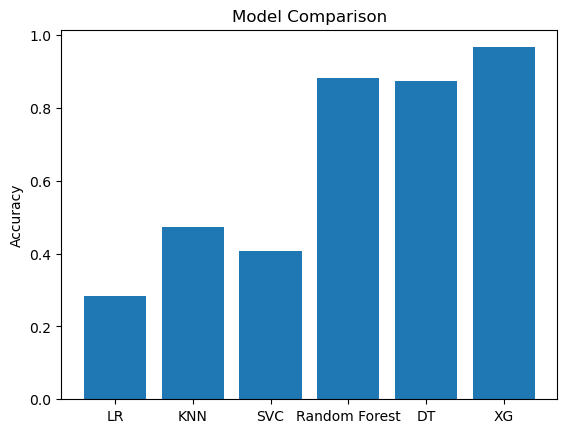

In [80]:
results = {
    "LR": (accuracy_LR),
    "KNN": accuracy_KNN,
    "SVC": accuracy_SVC,
    "Random Forest": accuracy_RFC,
    "DT":accuracy_DTC,
    "XG":acc_XG
}

import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values())
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

# Hyper parameter tuning using GridSearch and RandomSearchCV for Xgboost Classification

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Grid Search
grid = GridSearchCV(estimator=xgb_cfl , param_grid=param_grid, 
                    cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [82]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [83]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:",grid.best_score_)                        

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best CV Accuracy: 0.9602341597796145


In [84]:
y_pred = grid.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5

param_comb = 100

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)
print(random_search)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           n_estimators=None, n_jobs=-1,
                      

In [87]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=3)

In [88]:
y_pred = random_search.predict(X_test)

In [89]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


 Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, ...)

 Best accuracy for 5-fold search with 100 parameter combinations:
0.950289256198347

 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.02,

In [90]:
import joblib
joblib.dump(grid, "IPL_prediction_model.pkl")

['IPL_prediction_model.pkl']

In [91]:
ipl

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpires
0,9,14,407,14,13,13,1,1,0,14,35,0,224,28,27
1,9,26,408,8,11,11,1,1,0,11,0,7,199,21,3
2,9,28,409,4,7,7,1,1,0,7,0,10,34,31,238
3,9,15,410,11,5,5,1,1,0,5,0,6,61,13,7
4,9,2,410,13,3,13,0,1,0,13,15,0,99,17,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11,23,541,7,8,8,1,1,0,8,0,9,64,40,229
752,11,8,542,0,8,0,0,1,0,8,0,6,22,18,232
753,11,31,543,14,2,2,1,1,0,2,0,2,170,0,145
754,11,31,544,2,0,0,1,1,0,0,0,6,55,0,323


In [92]:
ipl.to_excel("output.xlsx", index=False)

print("Excel file saved successfully!")

Excel file saved successfully!


In [93]:
print(y)

0      14
1      11
2       7
3       5
4      13
       ..
751     8
752     8
753     2
754     0
755     8
Name: winner, Length: 756, dtype: int64


In [94]:
import pandas as pd
import joblib

# Load trained model
model = joblib.load("IPL_prediction_model.pkl")

# Example: User input (must match training features)
season = int(input("Enter season (encoded): "))
team1 = int(input("Enter team1 (encoded): "))
team2 = int(input("Enter team2 (encoded): "))
toss_winner = int(input("Enter toss winner (encoded): "))
toss_decision = int(input("Enter toss decision (encoded): "))
dl_applied = int(input("Enter DL applied (0/1): "))
win_by_runs = int(input("Enter win by runs: "))
win_by_wickets = int(input("Enter win by wickets: "))
venue = int(input("Enter venue (encoded): "))

# Build DataFrame with same features as training (NO 'winner')
user_data = pd.DataFrame([[
    season, team1, team2, toss_winner, toss_decision,
    dl_applied, win_by_runs, win_by_wickets, venue
]], columns=[
    'Season', 'team1', 'team2', 'toss_winner',
    'toss_decision', 'dl_applied', 'win_by_runs',
    'win_by_wickets', 'venue'
])

# Predict
prediction = model.predict(user_data)

print("🏏 Predicted Match Winner (encoded):", p0rediction[0])



Enter season (encoded):  9
Enter team1 (encoded):  14
Enter team2 (encoded):  13
Enter toss winner (encoded):  13
Enter toss decision (encoded):  1
Enter DL applied (0/1):  0
Enter win by runs:  38
Enter win by wickets:  0
Enter venue (encoded):  28


🏏 Predicted Match Winner (encoded): 14


In [96]:
# Suppose prediction is a numpy array like [7] (label encoded winner)
  # Example

# Dictionary mapping (label → team name)
team_labels = {
    0: "Chennai Super Kings",
    1: "Delhi Daredevils",
    2: "Delhi Capitals",
    3: "Gujarat Lions",
    4: "Kings XI Punjab",
    5: "Kolkata Knight Riders",
    6: "Kochi Tuskers Kerala",
    7: "Mumbai Indians",
    8: "Pune Warriors",
    9: "Rajasthan Royals",
    10: "Rising Pune Supergiant",
    11: "Rising Pune Supergiants",
    12: "Deccan Chargers",
    13: "Royal Challengers Bangalore",
    14: "Sunrisers Hyderabad"
}

# Convert prediction label → team name
predicted_team = team_labels.get(prediction[0], "Unknown")

print("Predicted Winner:", predicted_team)

Predicted Winner: Sunrisers Hyderabad
